In [1]:
import os
import sys
import inspect
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pathname = inspect.getframeinfo(inspect.currentframe()).filename
sys.path.append(os.path.abspath(os.path.dirname(pathname))+'/classes/')

from Model import *
import constants

In [2]:
complete = False

x = 36
y = 36
z = 2

shape = 'disk'

resolution = 500

constants.changeDirectory('MilkyWay')

modelFolder = 'r500_n20245/'

# Factors
constants.clumpMassFactor = 1
constants.interclumpMassFactor = 1
constants.FUVFactor = 1
constants.DensityFactor = 1

# Constant
constants.interclumpLogFUV = 1

# Model masses
constants.clumpLogMassNum = 4
constants.clumpLogMassRange = [-1, 2]
constants.interclumpLogMassNum = 2
constants.interclumpLogMassRange = [-3, -2]

In [3]:
print('KOSMA-tau^3')

species = ['13CO 10', 'C+ 1', 'CO 1', 'CO 2', 'CO 3', 'CO 4', 'CO 5', 'CO 6', 'CO 7', 'CO 8', 'CO 9', 'CO 10', '13CO 1', '13CO 2', '13CO 3', '13CO 4', '13CO 5', '13CO 6', '13CO 7', '13CO 8', '13CO 9', '13CO 10', 'O 2']
kosma = Model(x, y, z, modelType=shape, resolution=resolution)
kosma.addSpecies(species)

KOSMA-tau^3


In [4]:
import cyplot

images,wcs = cyplot.convertMap(modelFolder)
print(images.shape)

images = np.nan_to_num(images, nan=0)

/home/craig/projects/pdr/KOSMA-tau^3/classes/cyplot/cygrid.py:126: RuntimeWarning: divide by zero encountered in true_divide
  image = grid.get_datacube()
/home/craig/projects/pdr/KOSMA-tau^3/classes/cyplot/cygrid.py:126: RuntimeWarning: invalid value encountered in true_divide
  image = grid.get_datacube()


(49, 356, 200, 200)


In [23]:
image1 = cyplot.integrateVelocity(images, splitWavelengths=False)
image2 = cyplot.integrateVelocity(images, splitWavelengths=True)

In [41]:
print(np.where(~(image2==image1)))
print('Bad pixel when integrating all wavelengths: {}'.format(image1[10,80,104]))
print('Bad pixel when integrating each wavelengths: {}'.format(image2[10,80,104]))
print('Ratio: {}'.format(image1[76,80,104]/image2[76,80,104]))

(array([76]), array([80]), array([104]))
Bad pixel when integrating all wavelengths: 1.8559123760920372e-14
Bad pixel when integrating each wavelengths: 1.8559123760920372e-14
Ratio: 1.0000001192092896


In [48]:
n=image1[76,:,:].nonzero()

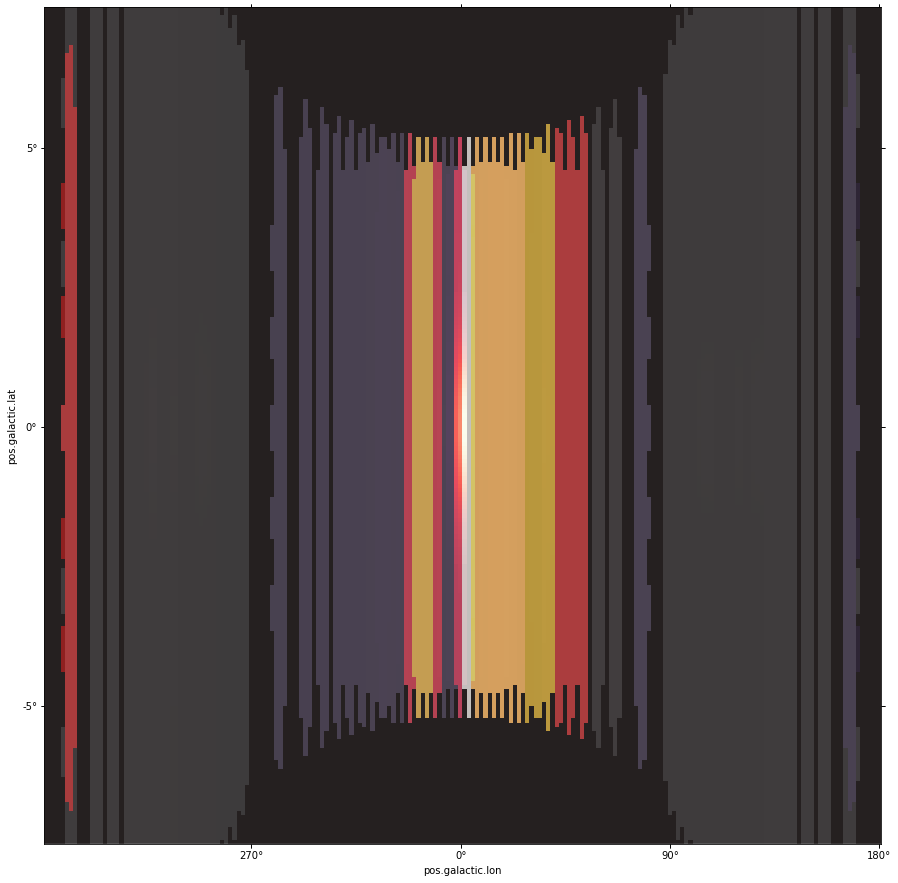

In [96]:
# for i in range(images[:,0,0,0].size):
#   fig = plt.figure(figsize=(20,40))
#   ax = fig.add_subplot(111, projection=wcs.celestial)
#   plt.imshow(images[i,332,:,:], cmap='bone')
#   plt.show()

vmin = image1[1,:,:].min()
vmax = image1[1,:,:].max()

fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(111, projection=wcs.celestial)
ax1.imshow(image1[1,:,:], alpha=0.5, vmin=vmin, vmax=vmax, cmap='bone')
ax1.imshow(image1[333,:,:], alpha=0.5, cmap='magma')
ax1.imshow(image1[355,:,:], alpha=0.5, cmap='hot')
plt.show()